In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import cv2
import os

from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, BatchNormalization, Conv2D, Dense, Dropout, Flatten, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
train_dir = '/kaggle/input/biggest-genderface-recognition-dataset/faces'

# **Image Enhancement Section**

**The samples without enhancement**

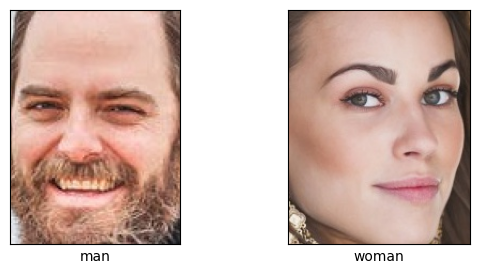

In [4]:
classes = ['man','woman']
plt.figure(figsize=(25, 25))
for i in range (0,2):
    plt.subplot(7,7,i+1)
    plt.xticks([])
    plt.yticks([])
    path = train_dir + "/{0}/{0}_1.jpg".format(classes[i])
    img = plt.imread(path)
    plt.imshow(img)
    plt.xlabel(classes[i])

# **Brightness & contrast**

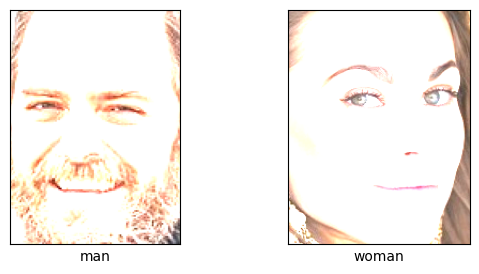

In [5]:
brightness = 10 
contrast = 2.3  
classes = ['man','woman']
plt.figure(figsize=(25, 25))
for i in range (0,2):
    plt.subplot(7,7,i+1)
    plt.xticks([])
    plt.yticks([])
    path = train_dir + "/{0}/{0}_1.jpg".format(classes[i])
    img = plt.imread(path)
    image2 = cv2.addWeighted(img, contrast, np.zeros(img.shape, img.dtype), 0, brightness) 
    plt.imshow(image2)
    plt.xlabel(classes[i])

# **Sharpening**

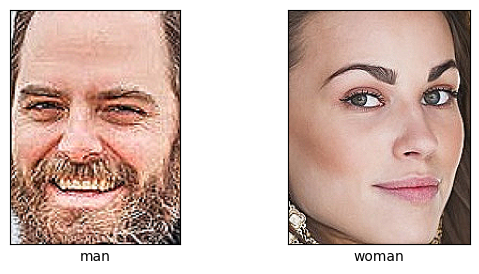

In [32]:
kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]]) 
classes = ['man','woman']
plt.figure(figsize=(25, 25))
for i in range (0,2):
    plt.subplot(7,7,i+1)
    plt.xticks([])
    plt.yticks([])
    path = train_dir + "/{0}/{0}_1.jpg".format(classes[i])
    img = plt.imread(path)
    image2 = cv2.filter2D(img, -1, kernel) 
    plt.imshow(image2)
    plt.xlabel(classes[i])

# **Sharpening edges using Laplacian**

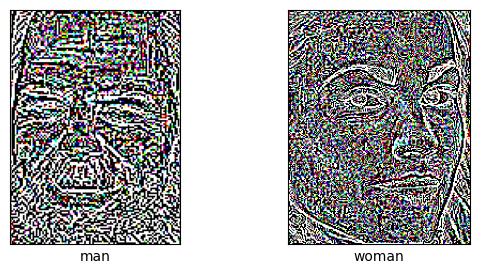

In [34]:
classes = ['man','woman']
plt.figure(figsize=(25, 25))
for i in range (0,2):
    plt.subplot(7,7,i+1)
    plt.xticks([])
    plt.yticks([])
    path = train_dir + "/{0}/{0}_1.jpg".format(classes[i])
    img = plt.imread(path)
    image2 = cv2.Laplacian(img, cv2.CV_64F) 
    plt.imshow(image2)
    plt.xlabel(classes[i])

# **Removing noise**

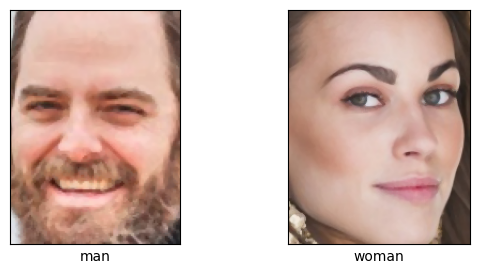

In [39]:
classes = ['man','woman']
plt.figure(figsize=(25, 25))
for i in range (0,2):
    plt.subplot(7,7,i+1)
    plt.xticks([])
    plt.yticks([])
    path = train_dir + "/{0}/{0}_1.jpg".format(classes[i])
    img = plt.imread(path)
    image2 = cv2.medianBlur(img, 3) 
    plt.imshow(image2)
    plt.xlabel(classes[i])

# **Adjust the colors of the image in HSV**

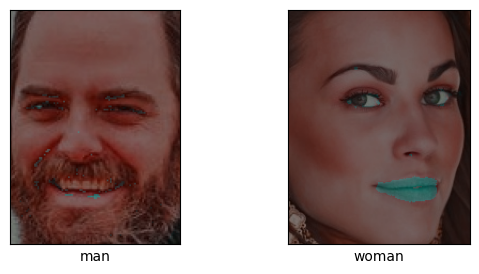

In [53]:
classes = ['man','woman']
plt.figure(figsize=(25, 25))
for i in range (0,2):
    plt.subplot(7,7,i+1)
    plt.xticks([])
    plt.yticks([])
    path = train_dir + "/{0}/{0}_1.jpg".format(classes[i])
    img = plt.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_RGB2HSV) 
  
    # Adjust....
    # hue -> 0
    # saturation -> 1
    # Value -> 2

    img[:, :, 0] = img[:, :, 0] * 0.5

    img[:, :, 1] = img[:, :, 1] * 1.5

    img[:, :, 2] = img[:, :, 2] * 0.5

    image2 = cv2.cvtColor(img, cv2.COLOR_HSV2RGB) 
    
    plt.imshow(image2)
    plt.xlabel(classes[i])

# **Resizing and scaling**

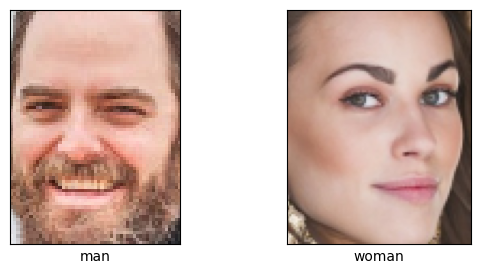

In [14]:
##enlarging the image -> INTER_LINEAR or INTER_CUBIC interpolation. 
##shrinking the image -> INTER_AREA interpolation.

classes = ['man','woman']
plt.figure(figsize=(25, 25))
for i in range (0,2):
    plt.subplot(7,7,i+1)
    plt.xticks([])
    plt.yticks([])
    path = train_dir + "/{0}/{0}_1.jpg".format(classes[i])
    img = plt.imread(path)
    image2 = cv2.resize(img, None, fx=0.5, fy=0.5, interpolation = cv2.INTER_AREA) 
    plt.imshow(image2)
    plt.xlabel(classes[i])

# **Inverse Transform**

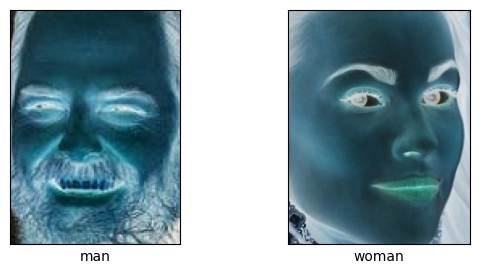

In [59]:
classes = ['man','woman']
plt.figure(figsize=(25, 25))
for i in range (0,2):
    plt.subplot(7,7,i+1)
    plt.xticks([])
    plt.yticks([])
    path = train_dir + "/{0}/{0}_1.jpg".format(classes[i])
    img = plt.imread(path)
    image2 = 255 - img 
    plt.imshow(image2)
    plt.xlabel(classes[i])

# **Histogram equalization**

*Histogram equalization* is a technique used to adjust the contrast of an image by spreading out the intensity values of the pixels in the image. It is important because it can improve the contrast and clarity of an image, making it easier to see details and features that might be difficult to see in an image with low contrast.

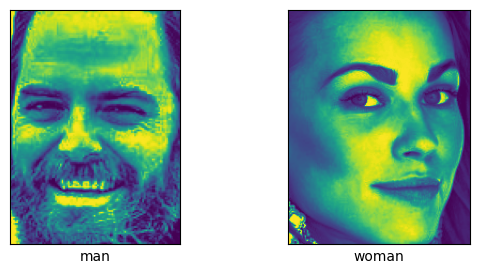

In [13]:
classes = ['man','woman']
plt.figure(figsize=(25, 25))
for i in range (0,2):
    plt.subplot(7,7,i+1)
    plt.xticks([])
    plt.yticks([])
    path = train_dir + "/{0}/{0}_1.jpg".format(classes[i])
    img = plt.imread(path)
    gray_image = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY) 
    image2 = cv2.equalizeHist(gray_image) 
    plt.imshow(image2)
    plt.xlabel(classes[i])

# **Canny Edge Detector**

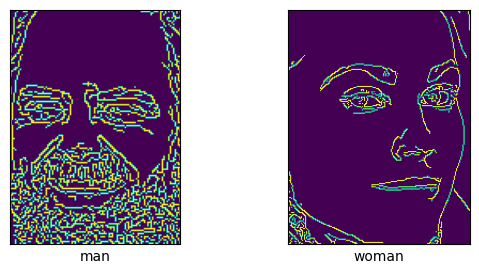

In [17]:
classes = ['man','woman']
plt.figure(figsize=(25, 25))
for i in range (0,2):
    plt.subplot(7,7,i+1)
    plt.xticks([])
    plt.yticks([])
    path = train_dir + "/{0}/{0}_1.jpg".format(classes[i])
    img = plt.imread(path)
    gray_image = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY) 
    image2 = cv2.Canny(gray_image, 50,150,apertureSize=3)
    plt.imshow(image2)
    plt.xlabel(classes[i])

# **Applying 8 features to the Images**

* Brightness & contrast
* Sharpening
* Removing noise
* Adjust the colors of the image in HSV
* Resizing and scaling
* Inverse Transform
* Histogram equalization
* Canny Edge Detector

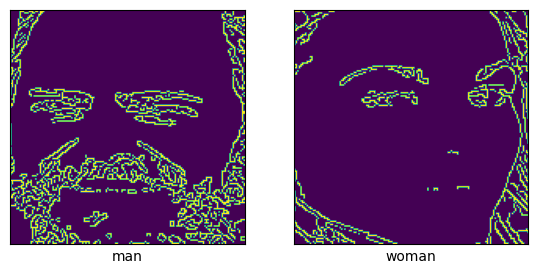

In [19]:
classes = ['man','woman']

brightness = 10 
contrast = 2.3  
kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]]) 
size = 150,150


plt.figure(figsize=(25, 25))
for i in range (0,2):
    plt.subplot(7,7,i+1)
    plt.xticks([])
    plt.yticks([])
    path = train_dir + "/{0}/{0}_1.jpg".format(classes[i])
    img = plt.imread(path)
    ##Resizing
    temp_img = cv2.resize(img, size)
    ##Brightness and contrast
    temp_img = cv2.addWeighted(temp_img, contrast, np.zeros(temp_img.shape, temp_img.dtype), 0, brightness) 
    ##Sharpening
    temp_img = cv2.filter2D(temp_img, -1, kernel) 
    ##Removing Noise
    temp_img = cv2.medianBlur(temp_img, 3) 
    ##Adjust HSV
    temp_img = cv2.cvtColor(temp_img, cv2.COLOR_RGB2HSV) 

    temp_img[:, :, 0] = temp_img[:, :, 0] * 0.5

    temp_img[:, :, 1] = temp_img[:, :, 1] * 1.5

    temp_img[:, :, 2] = temp_img[:, :, 2] * 0.5

    temp_img = cv2.cvtColor(temp_img, cv2.COLOR_HSV2RGB) 
    ##Inverse Transform
    temp_img = 255 - temp_img
    ##Histogram equalization
    gray_image = cv2.cvtColor(temp_img, cv2.COLOR_RGB2GRAY) 
    temp_img = cv2.equalizeHist(gray_image) 
    ##Canny Edge Detector
    temp_img = cv2.Canny(temp_img, threshold1=90,threshold2=90*3)
    plt.imshow(temp_img)
    plt.xlabel(classes[i])

In [20]:
labels_dict = {'man':0,'woman':1}

brightness = 10 
contrast = 2.3  
kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]]) 

images = []
labels = []
size = 150,150

for folder in os.listdir(train_dir):
    for image in os.listdir(train_dir + "/" + folder): ## iterate over the big folder then go to the sub folders inside it
        temp_img = cv2.imread(train_dir + '/' + folder + '/' + image)
        ##Resizing
        temp_img = cv2.resize(temp_img, size)
        ##Brightness and contrast
        temp_img = cv2.addWeighted(temp_img, contrast, np.zeros(temp_img.shape, temp_img.dtype), 0, brightness) 
        ##Sharpening
        temp_img = cv2.filter2D(temp_img, -1, kernel) 
        ##Removing Noise
        temp_img = cv2.medianBlur(temp_img, 3) 
        ##Adjust HSV
        temp_img = cv2.cvtColor(temp_img, cv2.COLOR_RGB2HSV) 

        temp_img[:, :, 0] = temp_img[:, :, 0] * 0.5

        temp_img[:, :, 1] = temp_img[:, :, 1] * 1.5

        temp_img[:, :, 2] = temp_img[:, :, 2] * 0.5

        temp_img = cv2.cvtColor(temp_img, cv2.COLOR_HSV2RGB) 
        ##Inverse Transform
        temp_img = 255 - temp_img
        ##Histogram equalization
        gray_image = cv2.cvtColor(temp_img, cv2.COLOR_RGB2GRAY) 
        temp_img = cv2.equalizeHist(gray_image) 
        ##Canny Edge Detector
        temp_img = cv2.Canny(temp_img, threshold1=90,threshold2=90*3)
         
        images.append(temp_img)
        labels.append(labels_dict[folder])
    
images = np.array(images)
images = images.astype('float32')/255.0 ## normalize the images
labels = keras.utils.to_categorical(labels) ##covert the classes to understandable catagories for model

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(images, labels, test_size = 0.2,random_state=0, stratify=labels)

print('Loaded', len(X_train),'images for training,','Train data shape =',X_train.shape)
print('Loaded', len(Y_test),'images for testing','Test data shape =',Y_test.shape)

Loaded 21733 images for training, Train data shape = (21733, 150, 150)
Loaded 5434 images for testing Test data shape = (5434, 2)


In [22]:
import gc
del images
del labels
gc.collect()

28863

In [30]:
model = Sequential([
    Conv2D(filters=128, kernel_size=(5, 5), padding='valid', input_shape=(150, 150,1)),
    Activation('relu'),
    MaxPooling2D(pool_size=(2, 2)),
    BatchNormalization(),

    Conv2D(filters=64, kernel_size=(3, 3), padding='valid', kernel_regularizer=l2(0.00005)),
    Activation('relu'),
    MaxPooling2D(pool_size=(2, 2)),
    BatchNormalization(),

    Conv2D(filters=32, kernel_size=(3, 3), padding='valid', kernel_regularizer=l2(0.00005)),
    Activation('relu'),
    MaxPooling2D(pool_size=(2, 2)),
    BatchNormalization(),

    Flatten(),
            Dense(units=256, activation='relu'),
    Dropout(0.5),
    Dense(units=2, activation='sigmoid')
])

In [31]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 146, 146, 128)     3328      
                                                                 
 activation_12 (Activation)  (None, 146, 146, 128)     0         
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 73, 73, 128)       0         
 ng2D)                                                           
                                                                 
 batch_normalization_12 (Ba  (None, 73, 73, 128)       512       
 tchNormalization)                                               
                                                                 
 conv2d_13 (Conv2D)          (None, 71, 71, 64)        73792     
                                                                 
 activation_13 (Activation)  (None, 71, 71, 64)       

In [32]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=np.sqrt(0.1), patience=5)

optimizer = Adam(learning_rate=0.001)

model.compile(optimizer=optimizer, loss=CategoricalCrossentropy(), metrics=['accuracy'])

In [33]:
history = model.fit(X_train,Y_train, epochs=10, validation_split=0.1,
                       verbose=2,
                       callbacks=[reduce_lr],shuffle=True)

Epoch 1/10
612/612 - 20s - loss: 0.6757 - accuracy: 0.7551 - val_loss: 0.4659 - val_accuracy: 0.7820 - lr: 0.0010 - 20s/epoch - 33ms/step
Epoch 2/10
612/612 - 14s - loss: 0.3926 - accuracy: 0.8313 - val_loss: 0.3903 - val_accuracy: 0.8335 - lr: 0.0010 - 14s/epoch - 24ms/step
Epoch 3/10
612/612 - 14s - loss: 0.3286 - accuracy: 0.8655 - val_loss: 0.3780 - val_accuracy: 0.8339 - lr: 0.0010 - 14s/epoch - 24ms/step
Epoch 4/10
612/612 - 14s - loss: 0.2719 - accuracy: 0.8891 - val_loss: 0.4246 - val_accuracy: 0.8298 - lr: 0.0010 - 14s/epoch - 23ms/step
Epoch 5/10
612/612 - 14s - loss: 0.2243 - accuracy: 0.9142 - val_loss: 0.5073 - val_accuracy: 0.8119 - lr: 0.0010 - 14s/epoch - 24ms/step
Epoch 6/10
612/612 - 14s - loss: 0.1792 - accuracy: 0.9328 - val_loss: 0.4760 - val_accuracy: 0.8385 - lr: 0.0010 - 14s/epoch - 24ms/step
Epoch 7/10
612/612 - 14s - loss: 0.1462 - accuracy: 0.9510 - val_loss: 0.6823 - val_accuracy: 0.8270 - lr: 0.0010 - 14s/epoch - 24ms/step
Epoch 8/10
612/612 - 14s - loss: 0

In [34]:
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

train_loss = history.history['loss']
val_loss = history.history['val_loss']

learning_rate = history.history['lr']

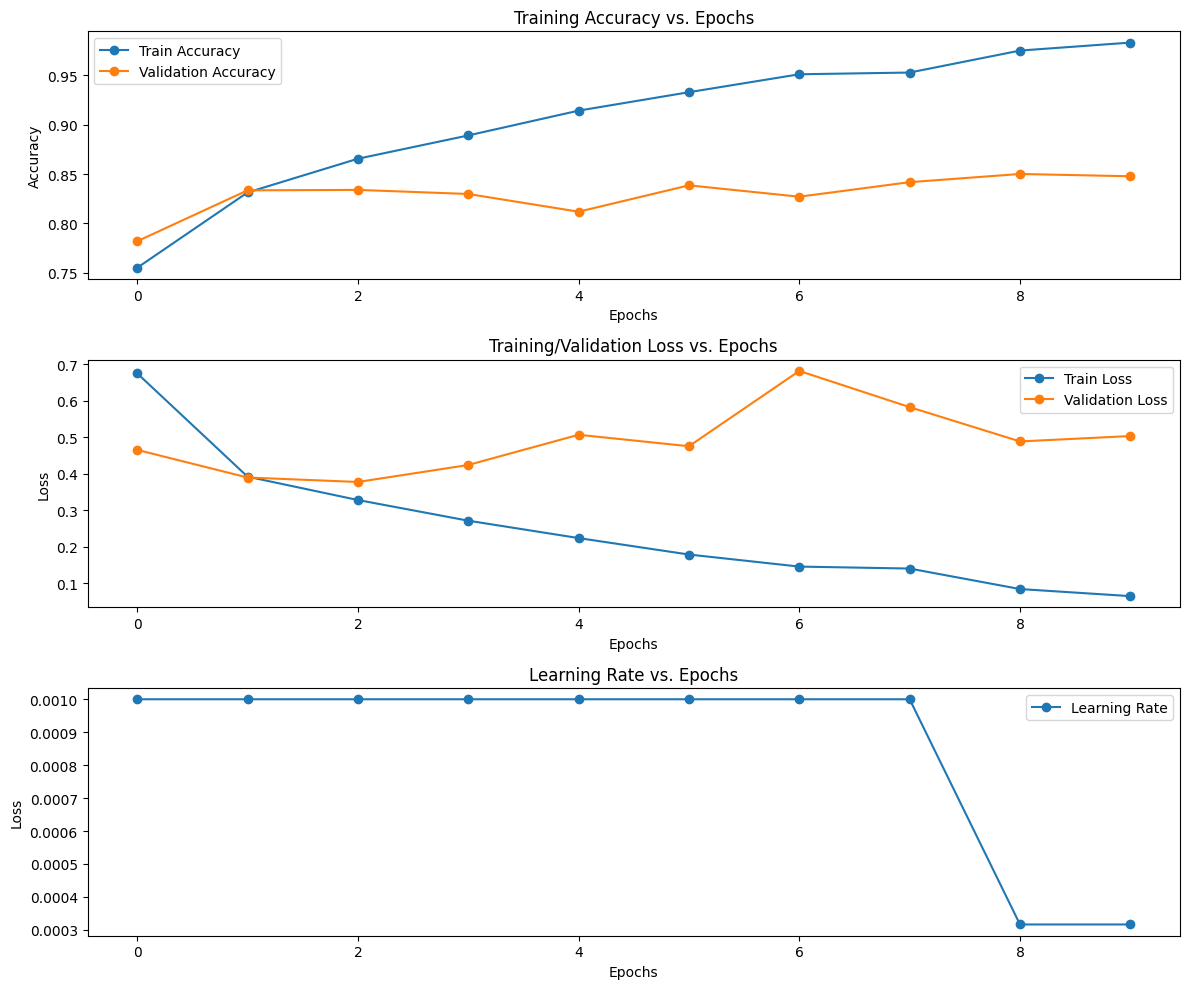

In [35]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(12, 10))

ax[0].set_title('Training Accuracy vs. Epochs')
ax[0].plot(train_accuracy, 'o-', label='Train Accuracy')
ax[0].plot(val_accuracy, 'o-', label='Validation Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].legend(loc='best')

ax[1].set_title('Training/Validation Loss vs. Epochs')
ax[1].plot(train_loss, 'o-', label='Train Loss')
ax[1].plot(val_loss, 'o-', label='Validation Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].legend(loc='best')

ax[2].set_title('Learning Rate vs. Epochs')
ax[2].plot(learning_rate, 'o-', label='Learning Rate')
ax[2].set_xlabel('Epochs')
ax[2].set_ylabel('Loss')
ax[2].legend(loc='best')

plt.tight_layout()
plt.show()

In [36]:
test_loss, test_accuracy = model.evaluate(X_test,Y_test)

170/170 [==============================] - 1s 9ms/step - loss: 0.5121 - accuracy: 0.8530


In [37]:
print(f"Test Loss:     {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

Test Loss:     0.5120716691017151
Test Accuracy: 0.852962851524353


In [38]:
predictions = model.predict(X_test)
y_pred = np.argmax(predictions, axis=1)
y_true = np.argmax(Y_test, axis=1)

170/170 [==============================] - 1s 6ms/step


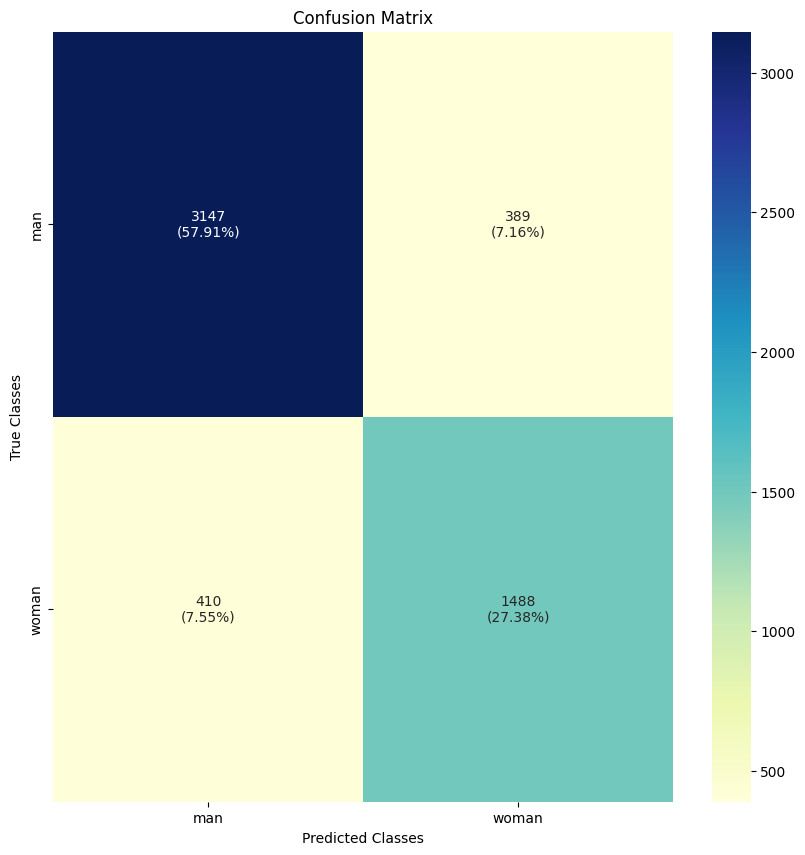

In [39]:
cf_mtx = confusion_matrix(y_true,y_pred)

class_labels = ['man','woman']

group_counts = ["{0:0.0f}".format(value) for value in cf_mtx.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_mtx.flatten() / np.sum(cf_mtx)]
box_labels = [f"{v1}\n({v2})" for v1, v2 in zip(group_counts, group_percentages)]

box_labels = np.asarray(box_labels).reshape(cf_mtx.shape[0], cf_mtx.shape[1])

plt.figure(figsize=(10, 10))
sns.heatmap(cf_mtx, xticklabels=class_labels, yticklabels=class_labels,
            cmap="YlGnBu", fmt="", annot=box_labels)
plt.xlabel('Predicted Classes')
plt.ylabel('True Classes')
plt.title('Confusion Matrix')
plt.show()

In [40]:
print(classification_report(y_true,y_pred,target_names=["man","woman"]))

              precision    recall  f1-score   support

         man       0.88      0.89      0.89      3536
       woman       0.79      0.78      0.79      1898

    accuracy                           0.85      5434
   macro avg       0.84      0.84      0.84      5434
weighted avg       0.85      0.85      0.85      5434



# Applying 4 filters

* Brightness & contrast
* Sharpening
* Histogram equalization
* Canny Edge Detector

In [41]:
labels_dict = {'man':0,'woman':1}

brightness = 10 
contrast = 2.3  
kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]]) 

images = []
labels = []
size = 150,150

for folder in os.listdir(train_dir):
    for image in os.listdir(train_dir + "/" + folder): ## iterate over the big folder then go to the sub folders inside it
        temp_img = cv2.imread(train_dir + '/' + folder + '/' + image)
        temp_img = cv2.resize(temp_img, size)
        ##Brightness and contrast
        temp_img = cv2.addWeighted(temp_img, contrast, np.zeros(temp_img.shape, temp_img.dtype), 0, brightness) 
        ##Sharpening
        temp_img = cv2.filter2D(temp_img, -1, kernel) 
        ##Histogram equalization
        gray_image = cv2.cvtColor(temp_img, cv2.COLOR_RGB2GRAY) 
        temp_img = cv2.equalizeHist(gray_image) 
        ##Canny Edge Detector
        temp_img = cv2.Canny(temp_img, threshold1=90,threshold2=90*3)
         
        images.append(temp_img)
        labels.append(labels_dict[folder])
    
images = np.array(images)
images = images.astype('float32')/255.0 ## normalize the images
labels = keras.utils.to_categorical(labels) ##covert the classes to understandable catagories for model

In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(images, labels, test_size = 0.2,random_state=0, stratify=labels)

print('Loaded', len(X_train),'images for training,','Train data shape =',X_train.shape)
print('Loaded', len(Y_test),'images for testing','Test data shape =',Y_test.shape)

Loaded 21733 images for training, Train data shape = (21733, 150, 150)
Loaded 5434 images for testing Test data shape = (5434, 2)


In [45]:
import gc
# del images
# del labels
del model
gc.collect()

1336

In [47]:
model = Sequential([
    Conv2D(filters=128, kernel_size=(5, 5), padding='valid', input_shape=(150, 150,1)),
    Activation('relu'),
    MaxPooling2D(pool_size=(2, 2)),
    BatchNormalization(),

    Conv2D(filters=64, kernel_size=(3, 3), padding='valid', kernel_regularizer=l2(0.00005)),
    Activation('relu'),
    MaxPooling2D(pool_size=(2, 2)),
    BatchNormalization(),

    Conv2D(filters=32, kernel_size=(3, 3), padding='valid', kernel_regularizer=l2(0.00005)),
    Activation('relu'),
    MaxPooling2D(pool_size=(2, 2)),
    BatchNormalization(),

    Flatten(),
            Dense(units=256, activation='relu'),
    Dropout(0.5),
    Dense(units=2, activation='sigmoid')
])

In [48]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=np.sqrt(0.1), patience=5)

optimizer = Adam(learning_rate=0.001)

model.compile(optimizer=optimizer, loss=CategoricalCrossentropy(), metrics=['accuracy'])

In [49]:
history = model.fit(X_train,Y_train, epochs=10, validation_split=0.1,
                       verbose=2,
                       callbacks=[reduce_lr],shuffle=True)

Epoch 1/10
612/612 - 18s - loss: 0.7092 - accuracy: 0.7636 - val_loss: 0.4150 - val_accuracy: 0.8293 - lr: 0.0010 - 18s/epoch - 29ms/step
Epoch 2/10
612/612 - 15s - loss: 0.3775 - accuracy: 0.8445 - val_loss: 0.3691 - val_accuracy: 0.8454 - lr: 0.0010 - 15s/epoch - 24ms/step
Epoch 3/10
612/612 - 15s - loss: 0.3123 - accuracy: 0.8740 - val_loss: 0.3908 - val_accuracy: 0.8477 - lr: 0.0010 - 15s/epoch - 24ms/step
Epoch 4/10
612/612 - 14s - loss: 0.2618 - accuracy: 0.8947 - val_loss: 0.4145 - val_accuracy: 0.8408 - lr: 0.0010 - 14s/epoch - 24ms/step
Epoch 5/10
612/612 - 15s - loss: 0.2155 - accuracy: 0.9180 - val_loss: 0.4273 - val_accuracy: 0.8560 - lr: 0.0010 - 15s/epoch - 24ms/step
Epoch 6/10
612/612 - 14s - loss: 0.1766 - accuracy: 0.9348 - val_loss: 0.4275 - val_accuracy: 0.8500 - lr: 0.0010 - 14s/epoch - 24ms/step
Epoch 7/10
612/612 - 14s - loss: 0.1534 - accuracy: 0.9458 - val_loss: 0.4169 - val_accuracy: 0.8542 - lr: 0.0010 - 14s/epoch - 24ms/step
Epoch 8/10
612/612 - 14s - loss: 0

In [50]:
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

train_loss = history.history['loss']
val_loss = history.history['val_loss']

learning_rate = history.history['lr']

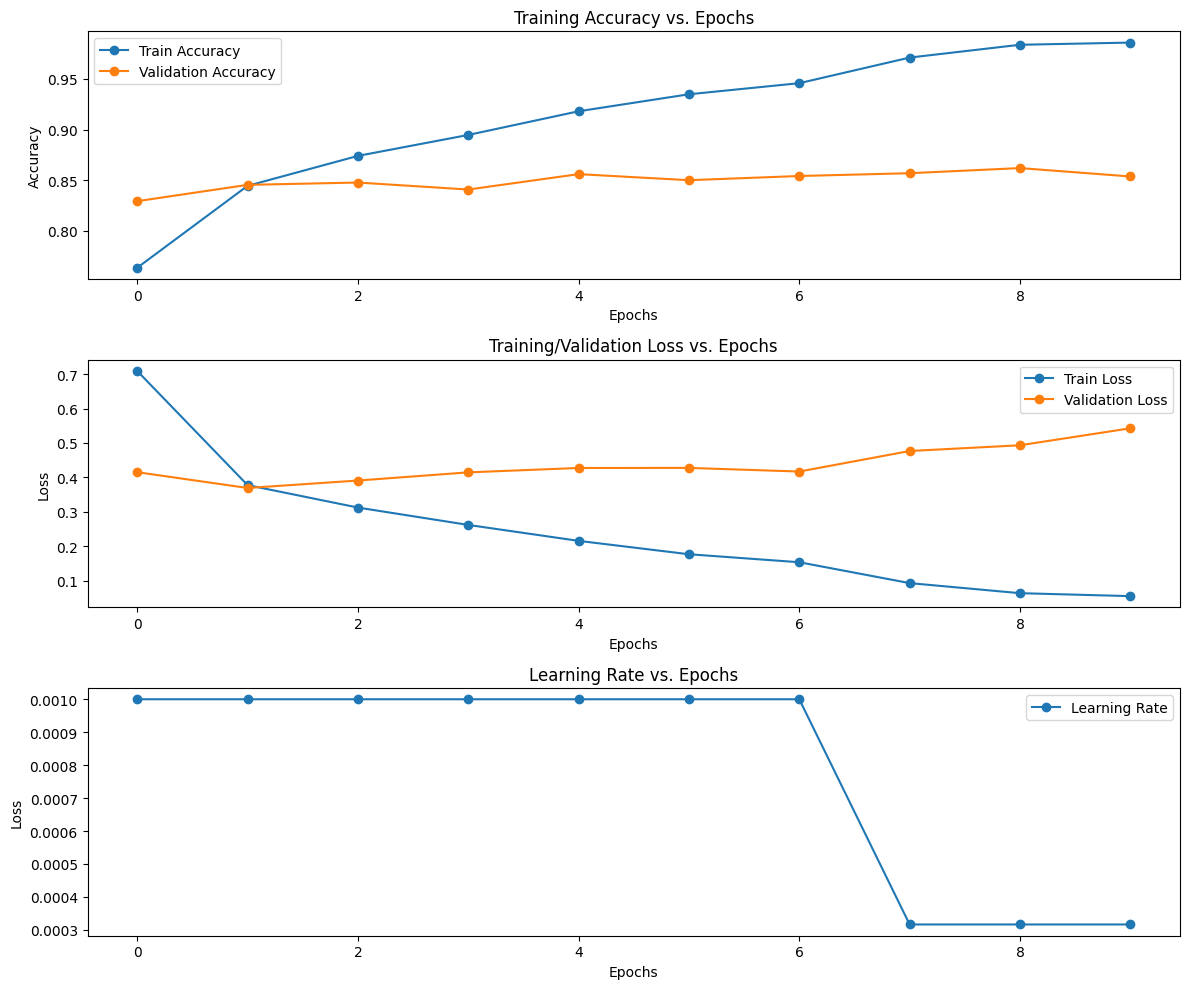

In [51]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(12, 10))

ax[0].set_title('Training Accuracy vs. Epochs')
ax[0].plot(train_accuracy, 'o-', label='Train Accuracy')
ax[0].plot(val_accuracy, 'o-', label='Validation Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].legend(loc='best')

ax[1].set_title('Training/Validation Loss vs. Epochs')
ax[1].plot(train_loss, 'o-', label='Train Loss')
ax[1].plot(val_loss, 'o-', label='Validation Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].legend(loc='best')

ax[2].set_title('Learning Rate vs. Epochs')
ax[2].plot(learning_rate, 'o-', label='Learning Rate')
ax[2].set_xlabel('Epochs')
ax[2].set_ylabel('Loss')
ax[2].legend(loc='best')

plt.tight_layout()
plt.show()

In [52]:
test_loss, test_accuracy = model.evaluate(X_test,Y_test)

print(f"Test Loss:     {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

170/170 [==============================] - 1s 8ms/step - loss: 0.4970 - accuracy: 0.8660
Test Loss:     0.4970276355743408
Test Accuracy: 0.8660287261009216


170/170 [==============================] - 1s 6ms/step


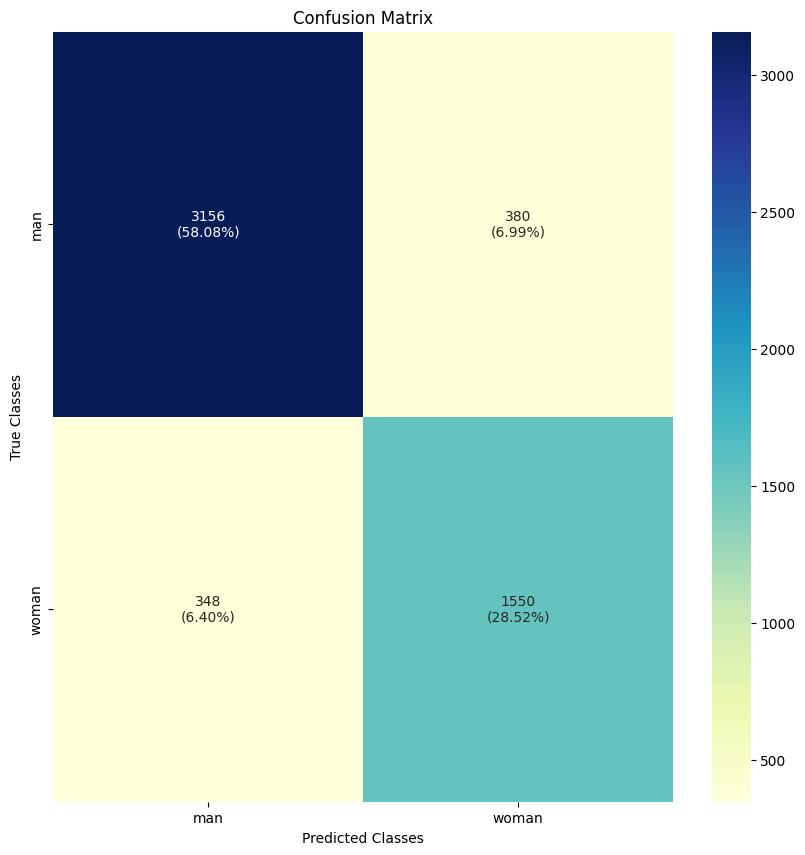

In [53]:
predictions = model.predict(X_test)
y_pred = np.argmax(predictions, axis=1)
y_true = np.argmax(Y_test, axis=1)

cf_mtx = confusion_matrix(y_true,y_pred)

class_labels = ['man','woman']

group_counts = ["{0:0.0f}".format(value) for value in cf_mtx.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_mtx.flatten() / np.sum(cf_mtx)]
box_labels = [f"{v1}\n({v2})" for v1, v2 in zip(group_counts, group_percentages)]

box_labels = np.asarray(box_labels).reshape(cf_mtx.shape[0], cf_mtx.shape[1])

plt.figure(figsize=(10, 10))
sns.heatmap(cf_mtx, xticklabels=class_labels, yticklabels=class_labels,
            cmap="YlGnBu", fmt="", annot=box_labels)
plt.xlabel('Predicted Classes')
plt.ylabel('True Classes')
plt.title('Confusion Matrix')
plt.show()

In [55]:
import gc
del images
del labels
del model
gc.collect()

21181

# Applying 2 filters

* Brightness & contrast
* Canny Edge Detector

In [56]:
labels_dict = {'man':0,'woman':1}

brightness = 10 
contrast = 2.3  
kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]]) 

images = []
labels = []
size = 150,150

for folder in os.listdir(train_dir):
    for image in os.listdir(train_dir + "/" + folder): ## iterate over the big folder then go to the sub folders inside it
        temp_img = cv2.imread(train_dir + '/' + folder + '/' + image)
        temp_img = cv2.resize(temp_img, size)
        ##Brightness and contrast
        temp_img = cv2.addWeighted(temp_img, contrast, np.zeros(temp_img.shape, temp_img.dtype), 0, brightness) 
        
        gray_image = cv2.cvtColor(temp_img, cv2.COLOR_RGB2GRAY) 
        ##Canny Edge Detector
        temp_img = cv2.Canny(temp_img, threshold1=90,threshold2=90*3)
         
        images.append(temp_img)
        labels.append(labels_dict[folder])
    
images = np.array(images)
images = images.astype('float32')/255.0 ## normalize the images
labels = keras.utils.to_categorical(labels) ##covert the classes to understandable catagories for model

In [57]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(images, labels, test_size = 0.2,random_state=0, stratify=labels)

print('Loaded', len(X_train),'images for training,','Train data shape =',X_train.shape)
print('Loaded', len(Y_test),'images for testing','Test data shape =',Y_test.shape)

Loaded 21733 images for training, Train data shape = (21733, 150, 150)
Loaded 5434 images for testing Test data shape = (5434, 2)


In [59]:
model = Sequential([
    Conv2D(filters=128, kernel_size=(5, 5), padding='valid', input_shape=(150, 150,1)),
    Activation('relu'),
    MaxPooling2D(pool_size=(2, 2)),
    BatchNormalization(),

    Conv2D(filters=64, kernel_size=(3, 3), padding='valid', kernel_regularizer=l2(0.00005)),
    Activation('relu'),
    MaxPooling2D(pool_size=(2, 2)),
    BatchNormalization(),

    Conv2D(filters=32, kernel_size=(3, 3), padding='valid', kernel_regularizer=l2(0.00005)),
    Activation('relu'),
    MaxPooling2D(pool_size=(2, 2)),
    BatchNormalization(),

    Flatten(),
            Dense(units=256, activation='relu'),
    Dropout(0.5),
    Dense(units=2, activation='sigmoid')
])

In [60]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=np.sqrt(0.1), patience=5)

optimizer = Adam(learning_rate=0.001)

model.compile(optimizer=optimizer, loss=CategoricalCrossentropy(), metrics=['accuracy'])

In [61]:
history = model.fit(X_train,Y_train, epochs=10, validation_split=0.1,
                       verbose=2,
                       callbacks=[reduce_lr],shuffle=True)

Epoch 1/10
612/612 - 18s - loss: 0.5925 - accuracy: 0.7775 - val_loss: 0.4098 - val_accuracy: 0.8261 - lr: 0.0010 - 18s/epoch - 29ms/step
Epoch 2/10
612/612 - 15s - loss: 0.3617 - accuracy: 0.8479 - val_loss: 0.3644 - val_accuracy: 0.8473 - lr: 0.0010 - 15s/epoch - 24ms/step
Epoch 3/10
612/612 - 14s - loss: 0.3079 - accuracy: 0.8725 - val_loss: 0.3432 - val_accuracy: 0.8546 - lr: 0.0010 - 14s/epoch - 24ms/step
Epoch 4/10
612/612 - 14s - loss: 0.2503 - accuracy: 0.9009 - val_loss: 0.4275 - val_accuracy: 0.8436 - lr: 0.0010 - 14s/epoch - 24ms/step
Epoch 5/10
612/612 - 14s - loss: 0.2117 - accuracy: 0.9176 - val_loss: 0.4602 - val_accuracy: 0.8620 - lr: 0.0010 - 14s/epoch - 24ms/step
Epoch 6/10
612/612 - 14s - loss: 0.1806 - accuracy: 0.9338 - val_loss: 0.3713 - val_accuracy: 0.8818 - lr: 0.0010 - 14s/epoch - 24ms/step
Epoch 7/10
612/612 - 14s - loss: 0.1512 - accuracy: 0.9491 - val_loss: 0.3762 - val_accuracy: 0.8781 - lr: 0.0010 - 14s/epoch - 24ms/step
Epoch 8/10
612/612 - 14s - loss: 0

In [62]:
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

train_loss = history.history['loss']
val_loss = history.history['val_loss']

learning_rate = history.history['lr']

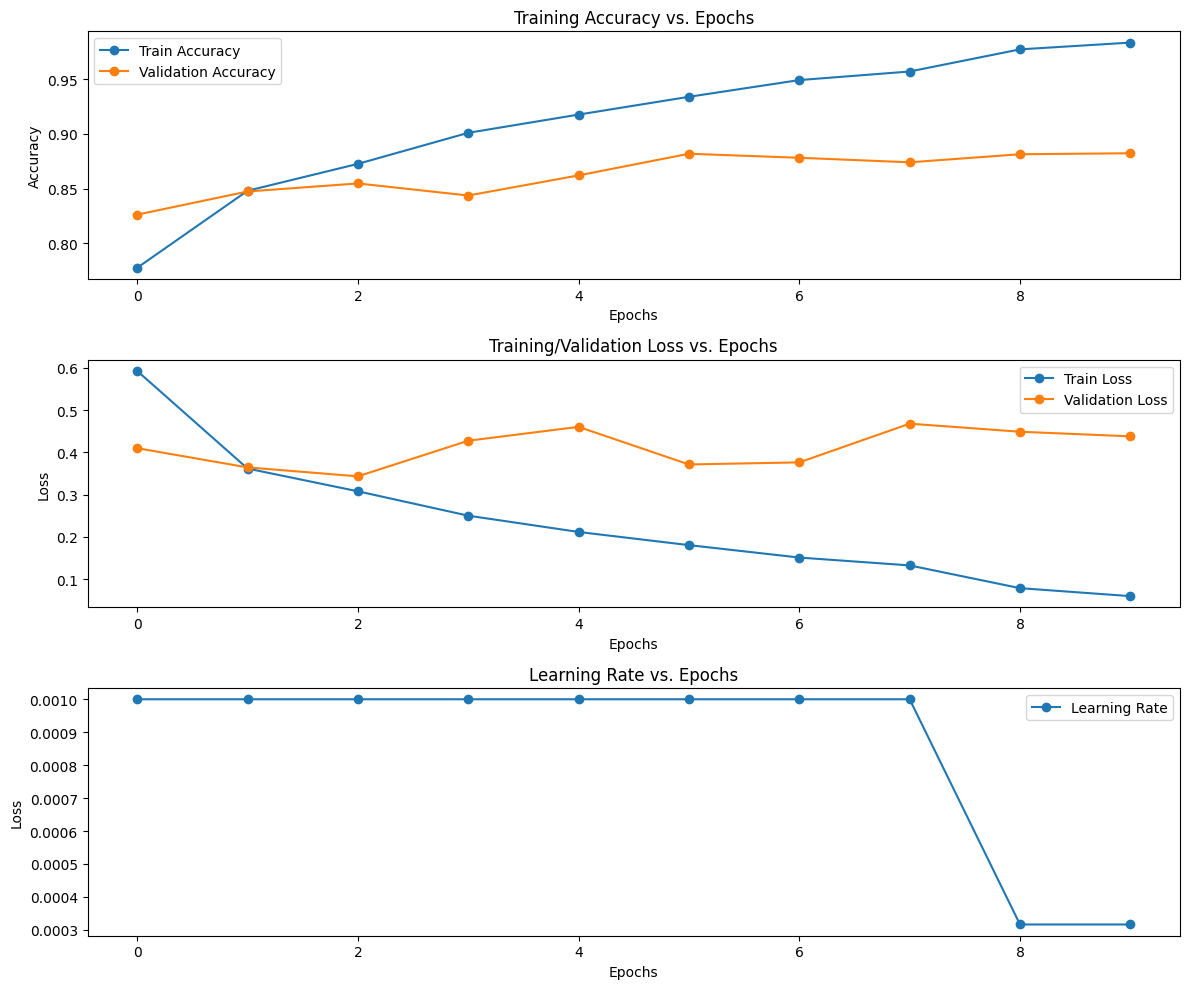

In [63]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(12, 10))

ax[0].set_title('Training Accuracy vs. Epochs')
ax[0].plot(train_accuracy, 'o-', label='Train Accuracy')
ax[0].plot(val_accuracy, 'o-', label='Validation Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].legend(loc='best')

ax[1].set_title('Training/Validation Loss vs. Epochs')
ax[1].plot(train_loss, 'o-', label='Train Loss')
ax[1].plot(val_loss, 'o-', label='Validation Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].legend(loc='best')

ax[2].set_title('Learning Rate vs. Epochs')
ax[2].plot(learning_rate, 'o-', label='Learning Rate')
ax[2].set_xlabel('Epochs')
ax[2].set_ylabel('Loss')
ax[2].legend(loc='best')

plt.tight_layout()
plt.show()

In [64]:
test_loss, test_accuracy = model.evaluate(X_test,Y_test)

print(f"Test Loss:     {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

170/170 [==============================] - 1s 8ms/step - loss: 0.4525 - accuracy: 0.8730
Test Loss:     0.45251214504241943
Test Accuracy: 0.8730217218399048


170/170 [==============================] - 1s 6ms/step


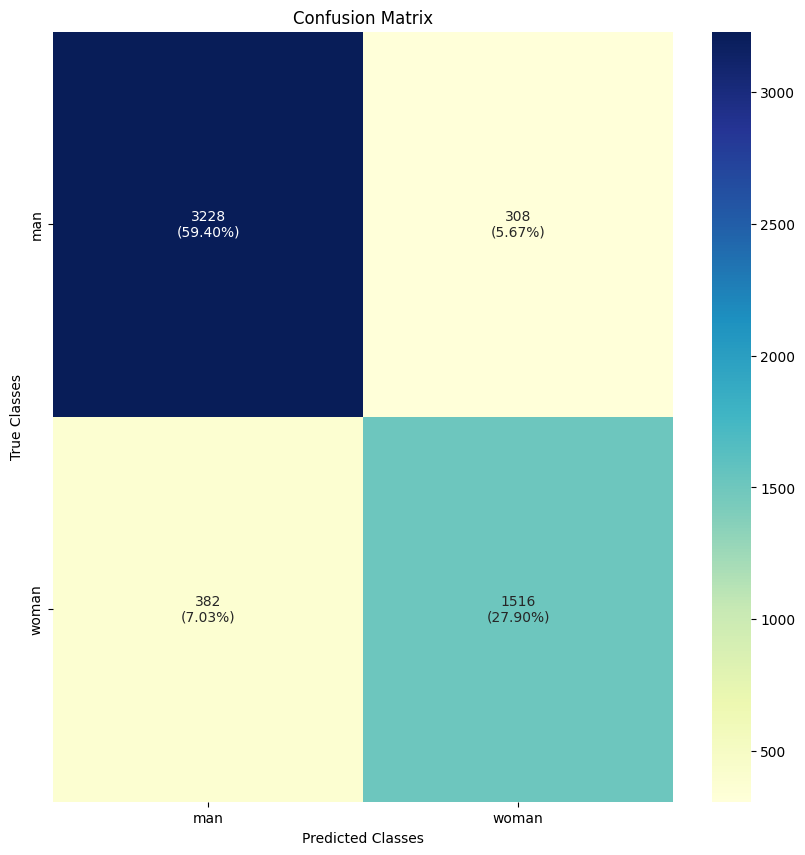

In [65]:
predictions = model.predict(X_test)
y_pred = np.argmax(predictions, axis=1)
y_true = np.argmax(Y_test, axis=1)

cf_mtx = confusion_matrix(y_true,y_pred)

class_labels = ['man','woman']

group_counts = ["{0:0.0f}".format(value) for value in cf_mtx.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_mtx.flatten() / np.sum(cf_mtx)]
box_labels = [f"{v1}\n({v2})" for v1, v2 in zip(group_counts, group_percentages)]

box_labels = np.asarray(box_labels).reshape(cf_mtx.shape[0], cf_mtx.shape[1])

plt.figure(figsize=(10, 10))
sns.heatmap(cf_mtx, xticklabels=class_labels, yticklabels=class_labels,
            cmap="YlGnBu", fmt="", annot=box_labels)
plt.xlabel('Predicted Classes')
plt.ylabel('True Classes')
plt.title('Confusion Matrix')
plt.show()

In [67]:
import gc
del images
del labels
del model
gc.collect()

21088

# No Enhancement applying

In [3]:
labels_dict = {'man':0,'woman':1}

brightness = 10 
contrast = 2.3  
kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]]) 

images = []
labels = []
size = 150,150

for folder in os.listdir(train_dir):
    for image in os.listdir(train_dir + "/" + folder): ## iterate over the big folder then go to the sub folders inside it
        temp_img = cv2.imread(train_dir + '/' + folder + '/' + image)
        temp_img = cv2.resize(temp_img, size)         
        images.append(temp_img)
        labels.append(labels_dict[folder])
    
images = np.array(images)
images = images.astype('float32')/255.0 ## normalize the images
labels = keras.utils.to_categorical(labels) ##covert the classes to understandable catagories for model

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(images, labels, test_size = 0.2,random_state=0, stratify=labels)

print('Loaded', len(X_train),'images for training,','Train data shape =',X_train.shape)
print('Loaded', len(Y_test),'images for testing','Test data shape =',Y_test.shape)

Loaded 21733 images for training, Train data shape = (21733, 150, 150, 3)
Loaded 5434 images for testing Test data shape = (5434, 2)


In [5]:
model = Sequential([
    Conv2D(filters=128, kernel_size=(5, 5), padding='valid', input_shape=(150, 150,3)),
    Activation('relu'),
    MaxPooling2D(pool_size=(2, 2)),
    BatchNormalization(),

    Conv2D(filters=64, kernel_size=(3, 3), padding='valid', kernel_regularizer=l2(0.00005)),
    Activation('relu'),
    MaxPooling2D(pool_size=(2, 2)),
    BatchNormalization(),

    Conv2D(filters=32, kernel_size=(3, 3), padding='valid', kernel_regularizer=l2(0.00005)),
    Activation('relu'),
    MaxPooling2D(pool_size=(2, 2)),
    BatchNormalization(),

    Flatten(),
            Dense(units=256, activation='relu'),
    Dropout(0.5),
    Dense(units=2, activation='sigmoid')
])

In [6]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=np.sqrt(0.1), patience=5)

optimizer = Adam(learning_rate=0.001)

model.compile(optimizer=optimizer, loss=CategoricalCrossentropy(), metrics=['accuracy'])

In [7]:
history = model.fit(X_train,Y_train, epochs=10, validation_split=0.1,
                       verbose=2,
                       callbacks=[reduce_lr],shuffle=True)

Epoch 1/10
612/612 - 25s - loss: 0.7419 - accuracy: 0.7635 - val_loss: 0.4033 - val_accuracy: 0.8330 - lr: 0.0010 - 25s/epoch - 40ms/step
Epoch 2/10
612/612 - 17s - loss: 0.3846 - accuracy: 0.8414 - val_loss: 0.5035 - val_accuracy: 0.7907 - lr: 0.0010 - 17s/epoch - 28ms/step
Epoch 3/10
612/612 - 17s - loss: 0.3178 - accuracy: 0.8702 - val_loss: 0.3430 - val_accuracy: 0.8565 - lr: 0.0010 - 17s/epoch - 28ms/step
Epoch 4/10
612/612 - 17s - loss: 0.2762 - accuracy: 0.8894 - val_loss: 0.3623 - val_accuracy: 0.8657 - lr: 0.0010 - 17s/epoch - 28ms/step
Epoch 5/10
612/612 - 17s - loss: 0.2439 - accuracy: 0.9069 - val_loss: 0.3007 - val_accuracy: 0.8721 - lr: 0.0010 - 17s/epoch - 28ms/step
Epoch 6/10
612/612 - 17s - loss: 0.2146 - accuracy: 0.9174 - val_loss: 0.3785 - val_accuracy: 0.8772 - lr: 0.0010 - 17s/epoch - 28ms/step
Epoch 7/10
612/612 - 17s - loss: 0.1982 - accuracy: 0.9243 - val_loss: 0.3101 - val_accuracy: 0.8947 - lr: 0.0010 - 17s/epoch - 28ms/step
Epoch 8/10
612/612 - 17s - loss: 0

In [8]:
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

train_loss = history.history['loss']
val_loss = history.history['val_loss']

learning_rate = history.history['lr']

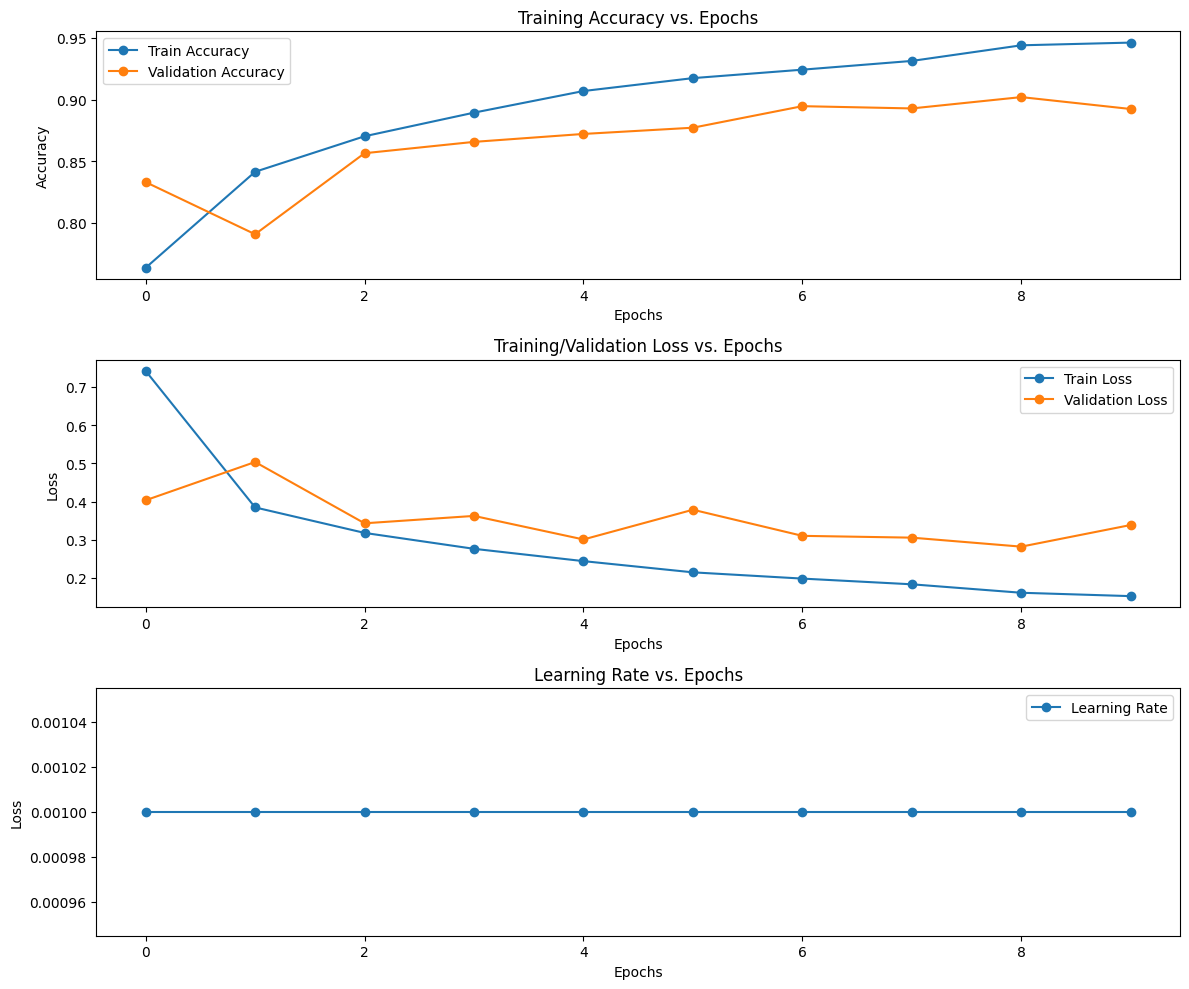

In [9]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(12, 10))

ax[0].set_title('Training Accuracy vs. Epochs')
ax[0].plot(train_accuracy, 'o-', label='Train Accuracy')
ax[0].plot(val_accuracy, 'o-', label='Validation Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].legend(loc='best')

ax[1].set_title('Training/Validation Loss vs. Epochs')
ax[1].plot(train_loss, 'o-', label='Train Loss')
ax[1].plot(val_loss, 'o-', label='Validation Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].legend(loc='best')

ax[2].set_title('Learning Rate vs. Epochs')
ax[2].plot(learning_rate, 'o-', label='Learning Rate')
ax[2].set_xlabel('Epochs')
ax[2].set_ylabel('Loss')
ax[2].legend(loc='best')

plt.tight_layout()
plt.show()

In [10]:
test_loss, test_accuracy = model.evaluate(X_test,Y_test)

print(f"Test Loss:     {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

170/170 [==============================] - 2s 12ms/step - loss: 0.3192 - accuracy: 0.9058
Test Loss:     0.3191562592983246
Test Accuracy: 0.9057784080505371


170/170 [==============================] - 2s 9ms/step


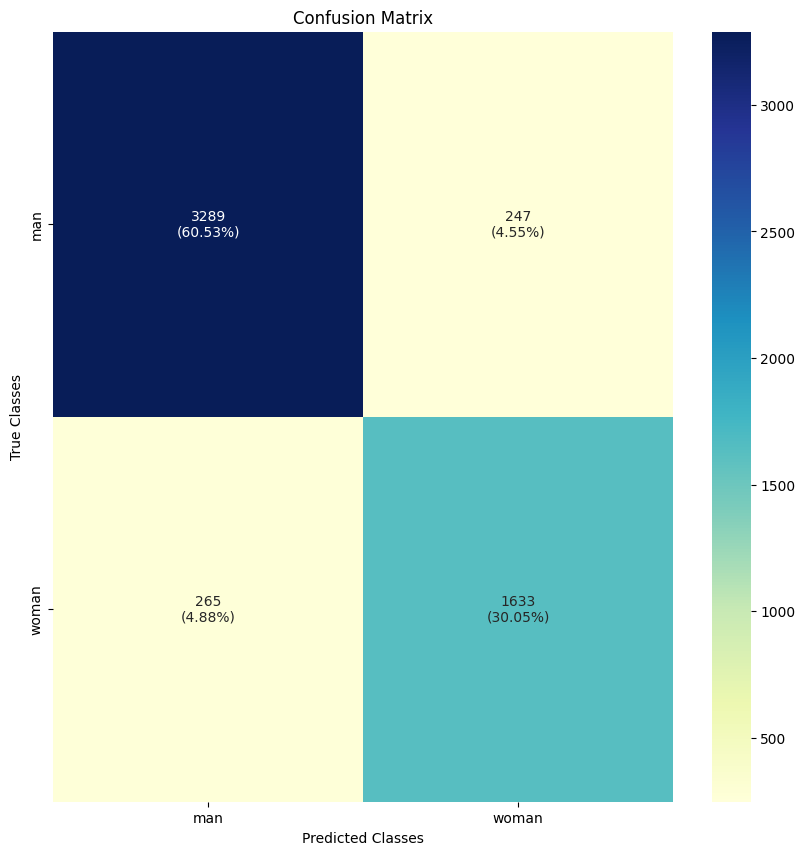

In [11]:
predictions = model.predict(X_test)
y_pred = np.argmax(predictions, axis=1)
y_true = np.argmax(Y_test, axis=1)

cf_mtx = confusion_matrix(y_true,y_pred)

class_labels = ['man','woman']

group_counts = ["{0:0.0f}".format(value) for value in cf_mtx.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_mtx.flatten() / np.sum(cf_mtx)]
box_labels = [f"{v1}\n({v2})" for v1, v2 in zip(group_counts, group_percentages)]

box_labels = np.asarray(box_labels).reshape(cf_mtx.shape[0], cf_mtx.shape[1])

plt.figure(figsize=(10, 10))
sns.heatmap(cf_mtx, xticklabels=class_labels, yticklabels=class_labels,
            cmap="YlGnBu", fmt="", annot=box_labels)
plt.xlabel('Predicted Classes')
plt.ylabel('True Classes')
plt.title('Confusion Matrix')
plt.show()

In [12]:
import gc
del images
del labels
del model
gc.collect()

7542